In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd 
# data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/countrydata-csv/Country-data.csv


In [2]:
df=pd.read_csv("/kaggle/input/countrydata-csv/Country-data.csv")
X = df.copy()
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [3]:
X.drop(columns="country",inplace=True)
mean=np.mean(X,axis=0)
std=np.std(X,axis=0)
X=(X-mean)/std

X

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817
...,...,...,...,...,...,...,...,...,...
162,-0.225578,0.200917,-0.571711,0.240700,-0.738527,-0.489784,-0.852161,0.365754,-0.546913
163,-0.526514,-0.461363,-0.695862,-1.213499,-0.033542,3.616865,0.546361,-0.316678,0.029323
164,-0.372315,1.130305,0.008877,1.380030,-0.658404,0.409732,0.286958,-0.661206,-0.637754
165,0.448417,-0.406478,-0.597272,-0.517472,-0.658924,1.500916,-0.344633,1.140944,-0.637754


In [4]:
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

In [5]:
class PCA:
    def __init__(self,n_components):
        self.n_components=n_components
        self.components=None
        self.mean=None
        self.variance_ratio=None
    def fit(self,X):
        self.mean=np.mean(X,axis=0)
        X=X-self.mean
        cov=np.cov(X.T)
        eigenvalues,eigenvectors=np.linalg.eig(cov)
        eigenvectors=eigenvectors.T
        idxs=np.argsort(eigenvalues)[::-1] #this is done to get the indices of the sorted eigenvalues in decreasing order
        eigenvalues=eigenvalues[idxs]
        eigenvectors=eigenvectors[idxs]
        self.variance_ratio=eigenvalues/np.sum(eigenvalues)
        self.components=eigenvectors[0:self.n_components]
        
        
    def transform(self,X):
        X=X-self.mean
        return np.dot(X,self.components.T)

In [6]:
pca=PCA(4)
pca.fit(X_train)
X_train=pca.transform(X_train)
X_test=pca.transform(X_test)
X=pca.transform(X)
print("variance ratio : ",pca.variance_ratio)

variance ratio :  [0.47172968 0.14401055 0.13992979 0.11161169 0.07558428 0.02757064
 0.01203546 0.00994771 0.0075802 ]


Text(0.5, 1.0, 'Scree Plot')

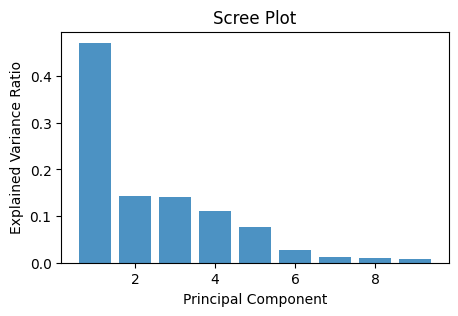

In [7]:
cumulative_variance = np.cumsum(pca.variance_ratio)

plt.figure(figsize=(5,3))

# Plot individual explained variance
plt.bar(range(1, len(pca.variance_ratio) + 1),pca.variance_ratio, alpha=0.8)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')



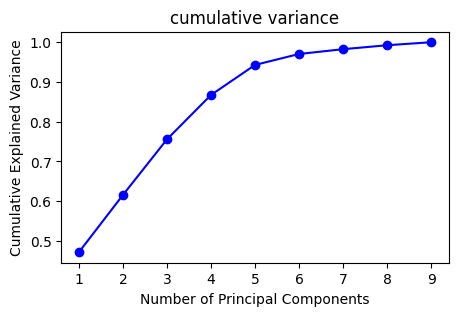

In [8]:
# Plot cumulative explained variance
plt.figure(figsize=(5,3))

plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('cumulative variance')


plt.show()

In [9]:
class KMeansClustering:
    @staticmethod
    def euclidean_distance(data_point,centroids):
        return np.sqrt(np.sum((centroids - data_point)**2, axis=1))
    
    def __init__(self,k=3):
        self.k=k
        self.centroids=None
        
    def fit(self,X,max_iterations=300):
        self.centroids=np.random.uniform(np.amin(X,axis=0),np.amax(X,axis=0),size=(self.k,X.shape[1])) #this intializes the centroids within the range so that it requires less number of iterations
        
        for _ in range(max_iterations):
            y=[]
            
            for data_point in X:
                distances=KMeansClustering.euclidean_distance(data_point,self.centroids)
                cluster_num=np.argmin(distances)#gives the index of the centroid which is closest to the point
                y.append(cluster_num)
            y=np.array(y)
            
            cluster_indices=[]
            
            for i in range(self.k):
                cluster_indices.append(np.argwhere(y==i))
            cluster_centers=[]
            
            for i,indices in enumerate(cluster_indices):
                if len(indices)==0:
                    cluster_centers.append(self.centroids[i])
                else:
                    cluster_centers.append(np.mean(X[indices],axis=0)[0])
            if np.max(self.centroids- np.array(cluster_centers))<0.0001:
                break
            else:
                self.centroids=np.array(cluster_centers)
        errors, total_error = kmeans.calculate_cluster_error(X, y)
        print("Cluster Errors:", errors)
        print("Total Sum of Squared Distances:", total_error)
        return y
    def calculate_cluster_error(self, X, labels):
        errors = []
        for i in range(self.k):
            cluster_points = X[labels == i]
            if len(cluster_points) > 0:
                cluster_center = self.centroids[i]
                error = np.sum(np.sum((cluster_points - cluster_center) ** 2, axis=1))
                errors.append(error)
        return errors, sum(errors)
                

Cluster Errors: [187.09791631950063, 194.75538011320546, 252.54220143805153]
Total Sum of Squared Distances: 634.3954978707576
Cluster Errors: [187.09791631950063, 194.75538011320546, 252.54220143805153]
Total Sum of Squared Distances: 634.3954978707576


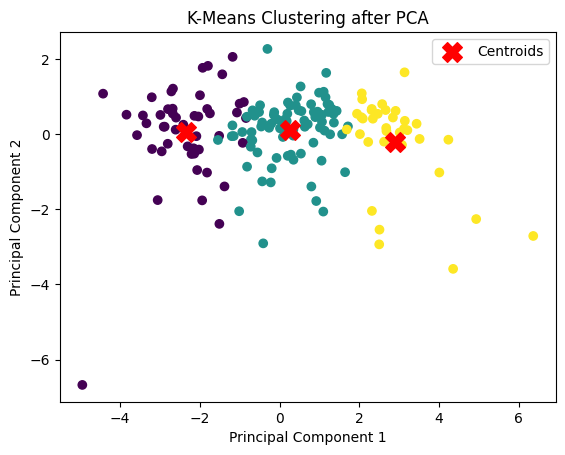

In [10]:
kmeans=KMeansClustering(k=3)
labels=kmeans.fit(X)
errors, total_error = kmeans.calculate_cluster_error(X, labels)
print("Cluster Errors:", errors)
print("Total Sum of Squared Distances:", total_error)
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering after PCA')
plt.legend()
plt.show()


In [11]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(X, labels)
print("Silhouette Score on Test Data:",silhouette_avg)

Silhouette Score on Test Data: 0.34004905214847425


In [12]:
df["cluster"]=labels
df[df["cluster"]==1]


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1
5,Argentina,14.5,18.9,8.10,16.0,18700,20.90,75.8,2.37,10300,1
6,Armenia,18.1,20.8,4.40,45.3,6700,7.77,73.3,1.69,3220,1
...,...,...,...,...,...,...,...,...,...,...,...
160,Uruguay,10.6,26.3,8.35,25.4,17100,4.91,76.4,2.08,11900,1
161,Uzbekistan,36.3,31.7,5.81,28.5,4240,16.50,68.8,2.34,1380,1
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,1
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,1


In [13]:
df[df["cluster"]==2]


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,2
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,2
15,Belgium,4.5,76.4,10.70,74.7,41100,1.880,80.0,1.86,44400,2
23,Brunei,10.5,67.4,2.84,28.0,80600,16.700,77.1,1.84,35300,2
29,Canada,5.6,29.1,11.30,31.0,40700,2.870,81.3,1.63,47400,2
42,Cyprus,3.6,50.2,5.97,57.5,33900,2.010,79.9,1.42,30800,2
43,Czech Republic,3.4,66.0,7.88,62.9,28300,-1.430,77.5,1.51,19800,2
44,Denmark,4.1,50.5,11.40,43.6,44000,3.220,79.5,1.87,58000,2
53,Finland,3.0,38.7,8.95,37.4,39800,0.351,80.0,1.87,46200,2
54,France,4.2,26.8,11.90,28.1,36900,1.050,81.4,2.03,40600,2


In [14]:
df[df["cluster"]==0]


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
0,Afghanistan,90.2,10.00,7.58,44.9,1610,9.440,56.2,5.82,553,0
3,Angola,119.0,62.30,2.85,42.9,5900,22.400,60.1,6.16,3530,0
17,Benin,111.0,23.80,4.10,37.2,1820,0.885,61.8,5.36,758,0
21,Botswana,52.5,43.60,8.30,51.3,13300,8.920,57.1,2.88,6350,0
25,Burkina Faso,116.0,19.20,6.74,29.6,1430,6.810,57.9,5.87,575,0
26,Burundi,93.6,8.92,11.60,39.2,764,12.300,57.7,6.26,231,0
28,Cameroon,108.0,22.20,5.13,27.0,2660,1.910,57.3,5.11,1310,0
31,Central African Republic,149.0,11.80,3.98,26.5,888,2.010,47.5,5.21,446,0
32,Chad,150.0,36.80,4.53,43.5,1930,6.390,56.5,6.59,897,0
36,Comoros,88.2,16.50,4.51,51.7,1410,3.870,65.9,4.75,769,0
